In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

rcParams['figure.figsize'] = (16, 8)
%matplotlib inline 

In [2]:
# Importing training data
data = pd.read_csv('./titanic/train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
# Removing unnecessary columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [11]:
# Treating Nulls values in the data, that is, in Age column
data.Age.isnull().sum()

177

In [12]:
mean_age = data.Age.mean()
np.round(mean_age)

30.0

In [13]:
data['Age'] = data['Age'].fillna(mean_age)
data['Age'].isna().sum()

0

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [15]:
from sklearn import preprocessing

In [16]:
lenc = preprocessing.LabelBinarizer()
lenc.fit(np.array(['male', 'female']))

LabelBinarizer()

In [17]:
list(lenc.classes_)

['female', 'male']

In [18]:
BinarizedSex = lenc.transform(np.array(data['Sex'])).reshape(891)

In [19]:
lenc.inverse_transform(np.array([0, 1, 1, 0]), threshold=0)

array(['female', 'male', 'male', 'female'], dtype='<U6')

In [20]:
data['Sex'] = BinarizedSex

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


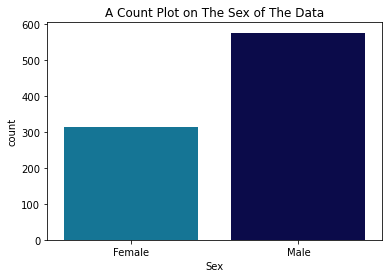

In [22]:
sns.countplot(data=data, x=data.Sex, palette='ocean_r')
plt.xticks(ticks=[0, 1], labels=['Female','Male'])
plt.title('A Count Plot on The Sex of The Data')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

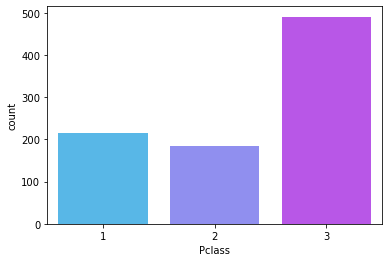

In [23]:
sns.countplot(x=data['Pclass'], data=data, palette='cool')

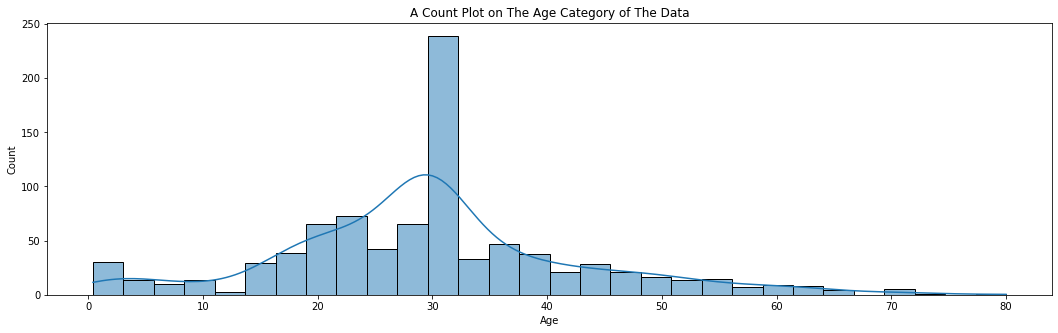

In [24]:
plt.figure(figsize=(18, 5))
sns.histplot(data=data, x=data.Age, palette='cool', kde=True, fill=True)
plt.title('A Count Plot on The Age Category of The Data')
plt.show()

#### The Age category of the Passengers on board is 39 from the Plot above

In [25]:
data['Age'] = data['Age'].round()
data['Age'].mean()

29.754208754208754

In [26]:
maxAge = data[['Age']].max()
minAge = data[['Age']].min()
print("The maximum age of the passengers on board is", round(maxAge[0]))
print("The minimum age of the passengers on board is", round(minAge[0]))

The maximum age of the passengers on board is 80
The minimum age of the passengers on board is 0


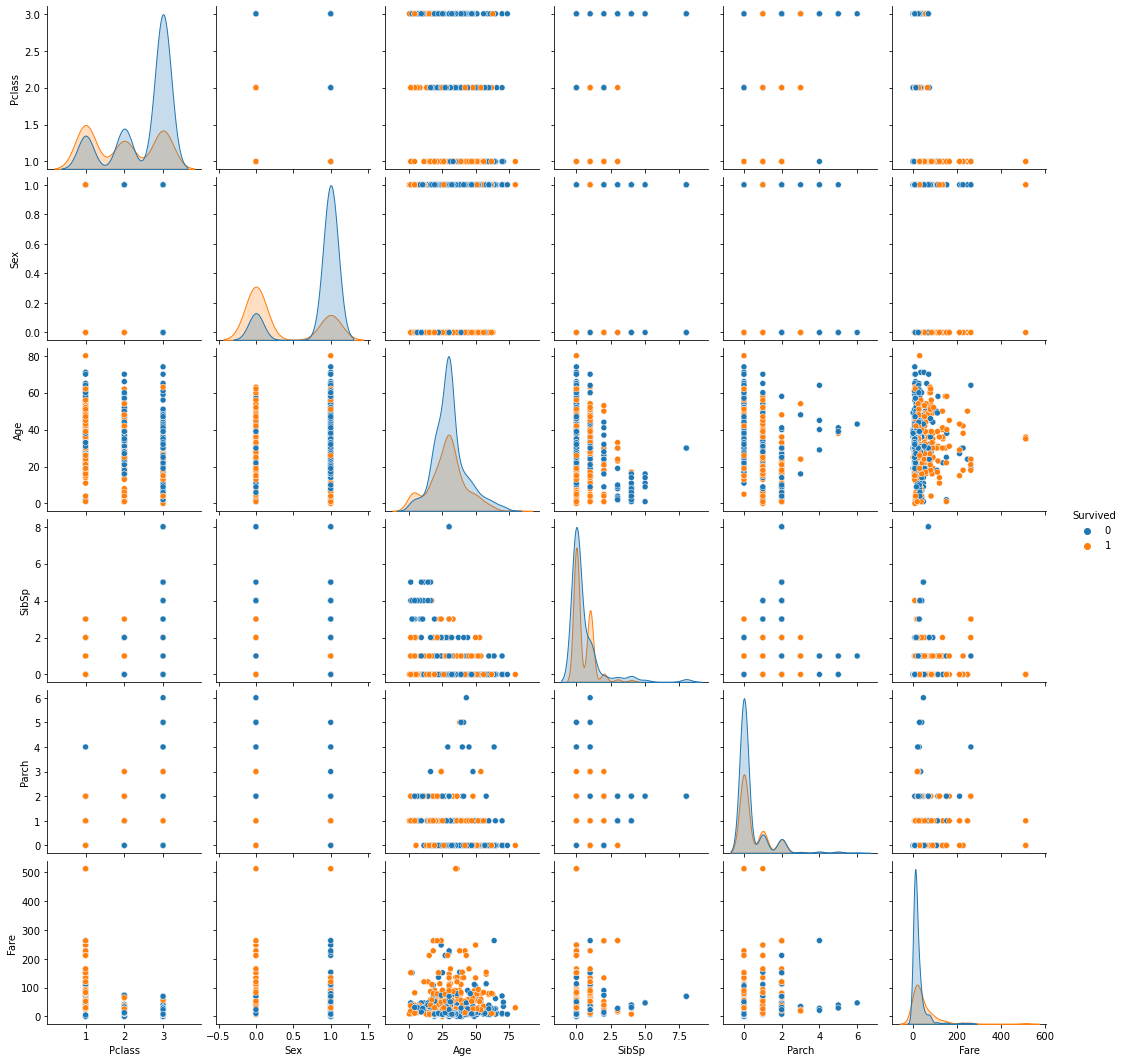

In [27]:
sns.pairplot(data, hue='Survived', hue_order=[0, 1])
plt.show()

In [28]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [29]:
feature = np.array(data.drop(columns='Survived'))
print(feature.shape)
print(type(feature))

(891, 6)
<class 'numpy.ndarray'>


In [30]:
feature[:10]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 3.    ,  1.    , 30.    ,  0.    ,  0.    ,  8.4583],
       [ 1.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 3.    ,  1.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 3.    ,  0.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 2.    ,  0.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [31]:
target = np.array(data['Survived'])
print(target.shape)
print(type(target))

(891,)
<class 'numpy.ndarray'>


In [32]:
target[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

In [35]:
X_train.shape

(712, 6)

In [36]:
X_train[:10]

array([[  3.    ,   1.    ,  16.    ,   2.    ,   0.    ,  18.    ],
       [  1.    ,   0.    ,  18.    ,   1.    ,   0.    , 227.525 ],
       [  2.    ,   0.    ,   4.    ,   2.    ,   1.    ,  39.    ],
       [  3.    ,   0.    ,  31.    ,   0.    ,   0.    ,   7.8542],
       [  3.    ,   1.    ,  30.    ,   0.    ,   0.    ,  15.1   ],
       [  1.    ,   1.    ,  35.    ,   0.    ,   0.    , 512.3292],
       [  3.    ,   1.    ,  30.    ,   0.    ,   0.    ,   9.5   ],
       [  2.    ,   0.    ,  36.    ,   0.    ,   0.    ,  13.    ],
       [  1.    ,   0.    ,  32.    ,   0.    ,   0.    ,  76.2917],
       [  1.    ,   0.    ,  30.    ,   0.    ,   0.    ,  93.5   ]])

In [37]:
y_test.shape

(179,)

In [38]:
y_test[:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [40]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': np.logspace(-4, 4, 20),
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter': [100, 1000, 2500, 5000]}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
bestCV = GridSearchCV(logreg, param_grid=param_grid, verbose=True, cv=3, n_jobs=-1)

In [43]:
bestCV.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1681 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [44]:
y_pred = bestCV.predict(X_test)

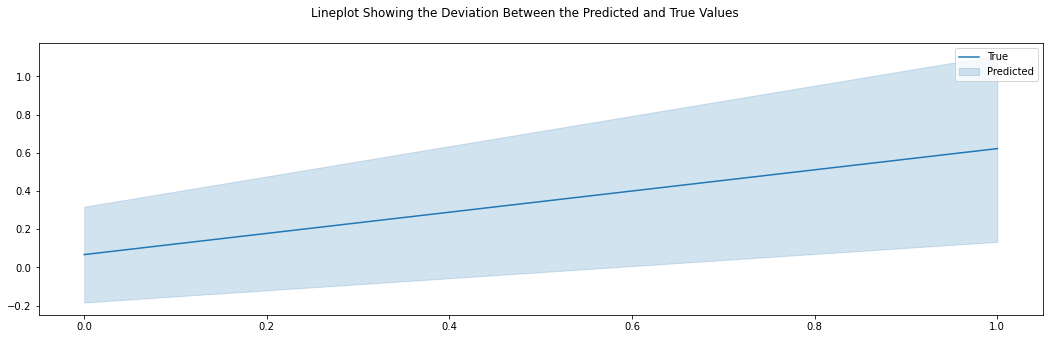

In [45]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=target, x=y_test, y=y_pred, ci='sd')
plt.legend(['True', 'Predicted'])
plt.suptitle('Lineplot Showing the Deviation Between the Predicted and True Values')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
bestCV.score(X_train, y_train)

0.8061797752808989

In [48]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [49]:
confusion_matrix(y_test, y_pred, labels=(1, 0))

array([[46, 28],
       [ 7, 98]], dtype=int64)

In [50]:
precision_score(y_test, y_pred)

0.8679245283018868

In [51]:
recall_score(y_test, y_pred)

0.6216216216216216

In [52]:
f1_score(y_test, y_pred)

0.7244094488188977

In [53]:
bestCV.best_estimator_

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scale = StandardScaler()
scale

StandardScaler()

In [56]:
X_train = scale.fit_transform(X_train)

In [57]:
X_test = scale.transform(X_test)

In [58]:
bestCV.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.8s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [59]:
bestCV.best_estimator_

LogisticRegression(C=0.03359818286283781, solver='sag')

In [60]:
y_pred = bestCV.predict(X_test)

In [61]:
bestCV.score(X_train, y_train)

0.8019662921348315

In [62]:
confusion_matrix(y_test, y_pred, labels=(1, 0))

array([[46, 28],
       [ 7, 98]], dtype=int64)

In [63]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [64]:
precision_score(y_test, y_pred)

0.8679245283018868

In [65]:
f1_score(y_test, y_pred)

0.7244094488188977